<a href="https://colab.research.google.com/github/chrismayemba/covid-19-open-data/blob/br-fix/GAN-Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
from torch import nn

import math
import matplotlib.pyplot as plt

In [2]:
torch.manual_seed(111)

In [3]:
train_data_length = 1024
train_data = torch.zeros((train_data_length, 2))
train_data[:, 0] = 2 * math.pi * torch.rand(train_data_length)
train_data[:, 1] = torch.sin(train_data[:, 0])
train_labels = torch.zeros(train_data_length)
train_set = [
    (train_data[i], train_labels[i]) for i in range(train_data_length)
]

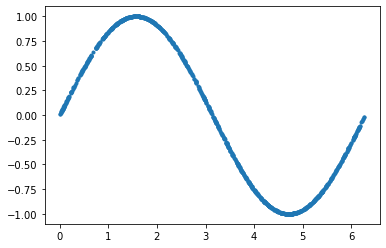

In [4]:
plt.plot(train_data[:, 0], train_data[:, 1], ".")

In [5]:
train_data_length = 1024
train_data = torch.zeros((train_data_length, 2))
train_data[:, 0] = 2 * math.pi * torch.rand(train_data_length)
train_data[:, 1] = torch.sin(train_data[:, 0])
train_labels = torch.zeros(train_data_length)
train_set = [
    (train_data[i], train_labels[i]) for i in range(train_data_length)
]

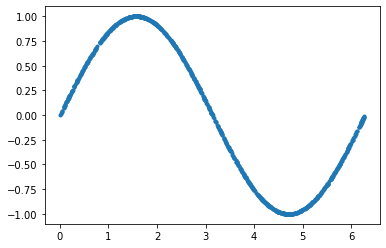

In [6]:
plt.plot(train_data[:, 0], train_data[:, 1], ".")


In [7]:
batch_size = 32
train_loader = torch.utils.data.DataLoader(
    train_set, batch_size=batch_size, shuffle=True
)

In [9]:
class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(2, 256),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(64, 1),
            nn.Sigmoid(),
        )

    def forward(self, x):
      output = self.model(x)
      return output


In [11]:
discriminator = Discriminator()

In [12]:
class Generator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(2, 16),
            nn.ReLU(),
            nn.Linear(16, 32),
            nn.ReLU(),
            nn.Linear(32, 2),
        )

    def forward(self, x):
        output = self.model(x)
        return output

generator = Generator()

In [13]:
lr = 0.001
num_epochs = 300
loss_function = nn.BCELoss()


In [14]:
optimizer_discriminator = torch.optim.Adam(discriminator.parameters(), lr=lr)
optimizer_generator = torch.optim.Adam(generator.parameters(), lr=lr)

In [16]:
for epoch in range(num_epochs):
    for n, (real_samples, _) in enumerate(train_loader):
        # Data for training the discriminator
        real_samples_labels = torch.ones((batch_size, 1))
        latent_space_samples = torch.randn((batch_size, 2))
        generated_samples = generator(latent_space_samples)
        generated_samples_labels = torch.zeros((batch_size, 1))
        all_samples = torch.cat((real_samples, generated_samples))
        all_samples_labels = torch.cat(
            (real_samples_labels, generated_samples_labels)
        )

        # Training the discriminator
        discriminator.zero_grad()
        output_discriminator = discriminator(all_samples)
        loss_discriminator = loss_function(
            output_discriminator, all_samples_labels)
        loss_discriminator.backward()
        optimizer_discriminator.step()

        # Data for training the generator
        latent_space_samples = torch.randn((batch_size, 2))

        # Training the generator
        generator.zero_grad()
        generated_samples = generator(latent_space_samples)
        output_discriminator_generated = discriminator(generated_samples)
        loss_generator = loss_function(
            output_discriminator_generated, real_samples_labels
        )
        loss_generator.backward()
        optimizer_generator.step()

        # Show loss
        if epoch % 10 == 0 and n == batch_size - 1:
            print(f"Epoch: {epoch} Loss D.: {loss_discriminator}")
            print(f"Epoch: {epoch} Loss G.: {loss_generator}")

Epoch: 0 Loss D.: 0.1319427192211151
Epoch: 0 Loss G.: 2.1414618492126465
Epoch: 10 Loss D.: 0.6088398098945618
Epoch: 10 Loss G.: 0.9455028772354126
Epoch: 20 Loss D.: 0.5946186780929565
Epoch: 20 Loss G.: 0.8376032114028931
Epoch: 30 Loss D.: 0.6955821514129639
Epoch: 30 Loss G.: 0.922143280506134
Epoch: 40 Loss D.: 0.7141282558441162
Epoch: 40 Loss G.: 0.5810321569442749
Epoch: 50 Loss D.: 0.64363032579422
Epoch: 50 Loss G.: 0.6841025352478027
Epoch: 60 Loss D.: 0.7818278074264526
Epoch: 60 Loss G.: 0.6904975175857544
Epoch: 70 Loss D.: 0.5975615978240967
Epoch: 70 Loss G.: 0.9175047874450684
Epoch: 80 Loss D.: 0.670281708240509
Epoch: 80 Loss G.: 0.801178514957428
Epoch: 90 Loss D.: 0.6019529700279236
Epoch: 90 Loss G.: 0.9277558922767639
Epoch: 100 Loss D.: 0.6805084943771362
Epoch: 100 Loss G.: 0.6951378583908081
Epoch: 110 Loss D.: 0.7121015787124634
Epoch: 110 Loss G.: 0.6851693987846375
Epoch: 120 Loss D.: 0.7089710831642151
Epoch: 120 Loss G.: 0.6583783626556396
Epoch: 130 Lo

In [17]:
latent_space_samples = torch.randn(100, 2)
generated_samples = generator(latent_space_samples)

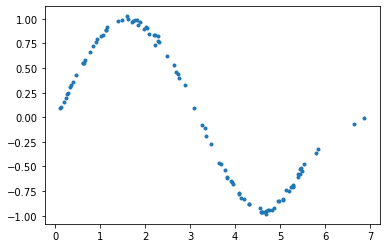

In [18]:
generated_samples = generated_samples.detach()
plt.plot(generated_samples[:, 0], generated_samples[:, 1], ".")